In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nodes = [(0, 1), (1, 2), (2, 0)]
x_nodes = np.array([node[0] for node in nodes])
y_nodes = np.array([node[1] for node in nodes])

h = np.diff(x_nodes)

A = np.array([
    [1, 0, 0],
    [h[0], 2*(h[0]+h[1]), h[1]],
    [0, 0, 1]
])

B = np.array([
    0,
    6 * ((y_nodes[2] - y_nodes[1])/h[1] - (y_nodes[1] - y_nodes[0])/h[0]),
    0
])

M = np.linalg.solve(A, B)
print("Second derivatives at nodes:", M)
print("\nSystem of Linear Equations:")
print("A =\n", A)
print("B =", B)


def get_spline_coeffs(i, x_i, x_i1, y_i, y_i1, M_i, M_i1, h_i):
    """Get coefficients for piece i: S_i(x) = a + b(x-x_i) + c(x-x_i)^2 + d(x-x_i)^3"""
    a = y_i
    b = (y_i1 - y_i)/h_i - h_i*(2*M_i + M_i1)/6
    c = M_i/2
    d = (M_i1 - M_i)/(6*h_i)
    return a, b, c, d


coeffs = []
for i in range(len(x_nodes)-1):
    a, b, c, d = get_spline_coeffs(i, x_nodes[i], x_nodes[i+1],
                                   y_nodes[i], y_nodes[i+1],
                                   M[i], M[i+1], h[i])
    coeffs.append((a, b, c, d))
    print(
        f"\nPiece {i} [{x_nodes[i]}, {x_nodes[i+1]}]: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}"
    )


def eval_spline(x):
    if x < x_nodes[0] or x > x_nodes[-1]:
        return None
    for i in range(len(x_nodes)-1):
        if x_nodes[i] <= x <= x_nodes[i+1]:
            a, b, c, d = coeffs[i]
            dx = x - x_nodes[i]
            return a + b*dx + c*dx**2 + d*dx**3
    return None

Second derivatives at nodes: [ 0.  -4.5  0. ]

System of Linear Equations:
A =
 [[1 0 0]
 [1 4 1]
 [0 0 1]]
B = [  0. -18.   0.]

Piece 0 [0, 1]: a=1.0000, b=1.7500, c=0.0000, d=-0.7500

Piece 1 [1, 2]: a=2.0000, b=-0.5000, c=-2.2500, d=0.7500


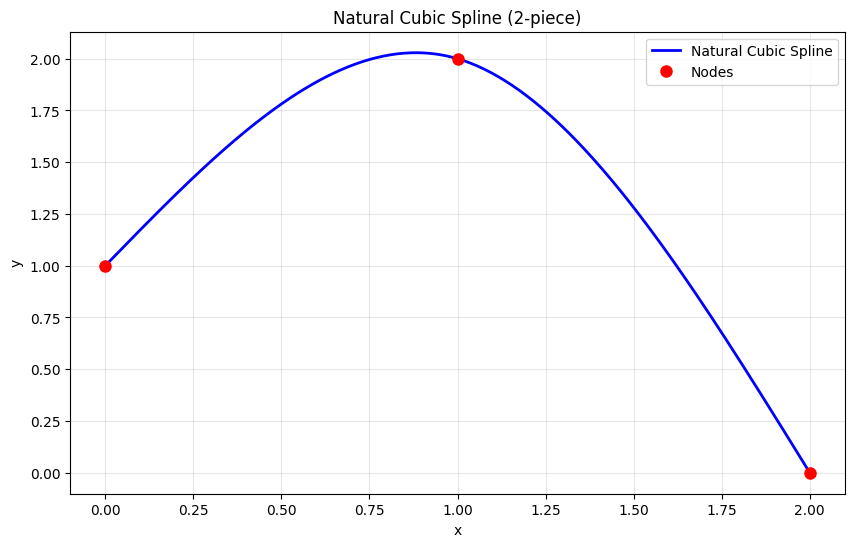

In [2]:
x_plot = np.linspace(x_nodes[0], x_nodes[-1], 300)
y_plot = np.array([eval_spline(x) for x in x_plot])

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='Natural Cubic Spline')
plt.plot(x_nodes, y_nodes, 'ro', markersize=8, label='Nodes')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Natural Cubic Spline (2-piece)')
plt.legend()
plt.show()